In [1]:
# IMPORTANT - the package cannot find COMETS or GUROBI unless the following variables are set:

import os

os.environ['COMETS_HOME'] = '/Applications/COMETS'
os.environ['GUROBI_HOME'] = '/Library/gurobi1003/macos_universal2/'

In [2]:
import cometspy as c
import matplotlib.pyplot as plt

# load smbl model directly as COMETS model object - also an option: load a model as a cobrapy model and convert this model to a COMETS model
k12 = c.model("../GEMs/iML1515.xml")

In [3]:
# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose and remove o2
test_tube.set_specific_metabolite('glc__D_e', 0.011)
test_tube.set_specific_metabolite('o2_e', 0)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000)
test_tube.set_specific_metabolite('pi_e',1000)
test_tube.set_specific_metabolite('h2o_e',1000)
test_tube.set_specific_metabolite('h_e',1000)

building empty layout model
models will need to be added with layout.add_model()


In [4]:
# remove the bounds from glucose import (will be set dynamically by COMETS)
k12.change_bounds('EX_glc__D_e', -1000, 1000)

# set the model's initial biomass
k12.initial_pop = [0, 0, 5e-2]

# add it to the test_tube
test_tube.add_model(k12)

In [5]:
# Create a parameters object with default values 
sim_params = c.params()

# Set the parameters that are different from the default
sim_params.set_param('defaultVmax', 18.5)
sim_params.set_param('defaultKm', 0.000015)
sim_params.set_param('maxCycles', 1000)
sim_params.set_param('timeStep', 0.01)
sim_params.set_param('spaceWidth', 1)
sim_params.set_param('maxSpaceBiomass', 10)
sim_params.set_param('minSpaceBiomass', 1e-11)
sim_params.set_param('writeMediaLog', True)

In [6]:
# initialise experiment
experiment = c.comets(test_tube, sim_params)

In [7]:
# run experiment
experiment.run()


Running COMETS simulation ...


/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lin

Done!


Text(0, 0.5, 'Biomass (gr.)')

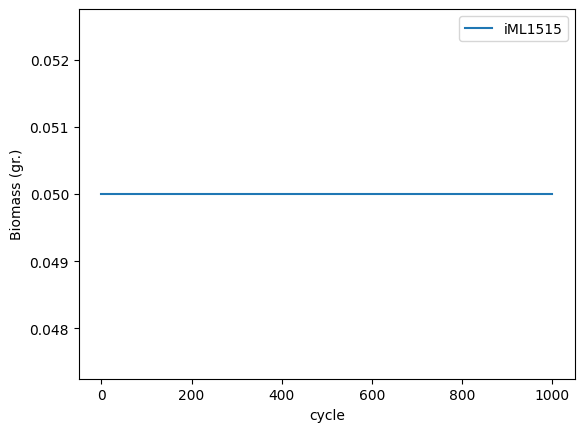

In [8]:
# visualise biomass
ax = experiment.total_biomass.plot(x = 'cycle')
ax.set_ylabel("Biomass (gr.)")

Text(0, 0.5, 'Concentration (mmol)')

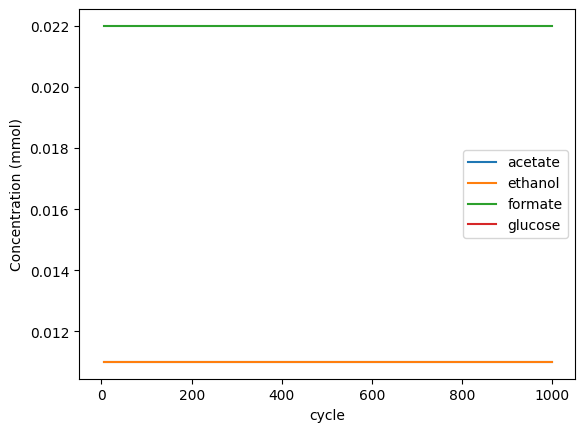

In [9]:
# visualise media
media = experiment.media.copy()
media = media[media.conc_mmol<900]

fig, ax = plt.subplots()
media.groupby('metabolite').plot(x='cycle', ax =ax, y='conc_mmol')
ax.legend(('acetate','ethanol', 'formate', 'glucose'))
ax.set_ylabel("Concentration (mmol)")

In [9]:
# Create a parameters object with default values 
my_params = c.params()

# Change the value of a parameter, for example number of simulation cycles
my_params.set_param('maxCycles', 100)

# Set some writeTotalBiomassLog parameter to True, in order to save the output
my_params.set_param('writeTotalBiomassLog', True)

# See avaliable parameters and their values
#my_params.show_params()

In [10]:
# initialise a layout object using the COMETS model
# the medium will then automatically be all possible exhange-metabilites at zero concentration, and metals/ions at unlimited levels (-1000)
my_layout = c.layout(k12)
#my_layout.media

In [11]:
# create a simulation
my_simulation = c.comets(my_layout, my_params)
my_simulation.run()


Running COMETS simulation ...


/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lin

Done!


In [12]:
print(my_simulation.run_output)
print(my_simulation.run_errors)

-script
running script file: /Users/andreastallvik/Projects/BIOTBT3900/community_modelling/RAsynthesis/.current_script_0x122b6a3b0
Current Java version: 1.8.0_381
Parameters file .current_global_0x122b6a3b0 loaded.
Parameters file .current_package_0x122b6a3b0 loaded.
Loading layout file '.current_layout_0x122b6a3b0'...
null/COMETS_manifest.txt (No such file or directory)
Unable to initialize manifest file. 
Continuing without writing manifest file.
Found 1 model files!
Loading './iML1515.cmd' ...
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-17
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-17
Done!
 Testing default parameters...
Done!
Optimizer status code = 5 (looks ok!)
objective solution = 0.8769972144269688
Constructing world...
Done!
medialist	12ppd__R_e	12ppd__S_e	14glucan_e	15dap_e	23camp_e	23ccmp_e	23cgmp_e	23cump_e	23dappa_e	26dap__M_e	2ddglcn_e	2dglc_e	34dhpac_e	3amp_e	3cmp_e	3gmp_e	3hcinnm_e	

Following tutorial

In [14]:
import cometspy as c
import cobra.io
import matplotlib.pyplot as plt

In [15]:
# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose and remove o2
test_tube.set_specific_metabolite('glc__D_e', 0.011)
test_tube.set_specific_metabolite('o2_e', 0)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000);
test_tube.set_specific_metabolite('pi_e',1000);
test_tube.set_specific_metabolite('h2o_e',1000);
test_tube.set_specific_metabolite('h_e',1000);

building empty layout model
models will need to be added with layout.add_model()


In [16]:
# create the model using CobraPy functionality
e_coli_cobra = cobra.io.load_model('textbook')

# use the loaded model to build a comets model
e_coli = c.model(e_coli_cobra)

# remove the bounds from glucose import (will be set dynamically by COMETS)
e_coli.change_bounds('EX_glc__D_e', -1000, 1000)

# set the model's initial biomass
e_coli.initial_pop = [0, 0, 5e-6]

# add it to the test_tube
test_tube.add_model(e_coli)

In [17]:
# Set the parameters that are different from the default
sim_params = c.params()

In [18]:
sim_params.set_param('defaultVmax', 18.5)
sim_params.set_param('defaultKm', 0.000015)
sim_params.set_param('maxCycles', 1000)
sim_params.set_param('timeStep', 0.01)
sim_params.set_param('spaceWidth', 1)
sim_params.set_param('maxSpaceBiomass', 10)
sim_params.set_param('minSpaceBiomass', 1e-11)
sim_params.set_param('writeMediaLog', True)

In [19]:
experiment = c.comets(test_tube, sim_params)

In [20]:
experiment.run()


Running COMETS simulation ...


/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lin

Done!


Text(0, 0.5, 'Biomass (gr.)')

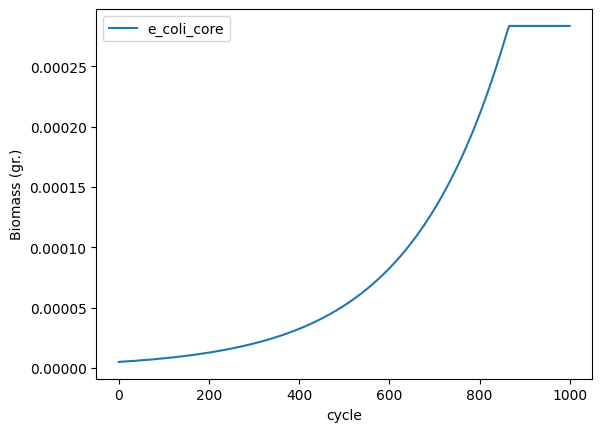

In [21]:
ax = experiment.total_biomass.plot(x = 'cycle')
ax.set_ylabel("Biomass (gr.)")

Text(0, 0.5, 'Concentration (mmol)')

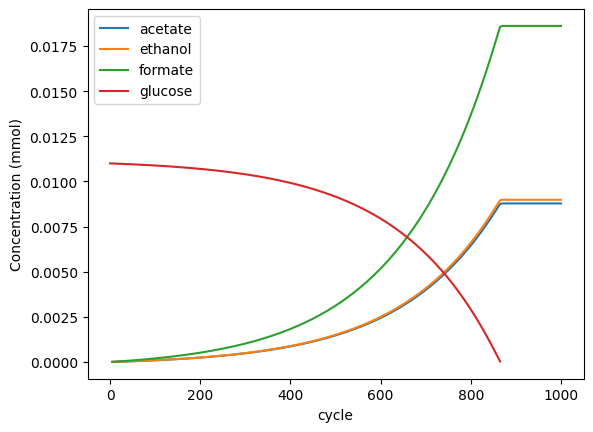

In [22]:
media = experiment.media.copy()
media = media[media.conc_mmol<900]

fig, ax = plt.subplots()
media.groupby('metabolite').plot(x='cycle', ax =ax, y='conc_mmol')
ax.legend(('acetate','ethanol', 'formate', 'glucose'))
ax.set_ylabel("Concentration (mmol)")